In [3]:
import zipfile
import os

# Define the path to the ZIP file and extraction folder
zip_file_path = r"C:\Users\gnana\Desktop\Major project\archive (10).zip"
extract_folder = r"C:\Users\gnana\Desktop\Major project\ISL_dataset"

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Dataset extracted successfully to:", extract_folder)


Dataset extracted successfully to: C:\Users\gnana\Desktop\Major project\ISL_dataset


In [4]:
import os

# Path to ISL dataset
dataset_path = r"C:\Users\gnana\Desktop\Major project\ISL_dataset"

# Function to print folder structure
def display_folder_structure(root_dir, indent=0):
    for item in sorted(os.listdir(root_dir)):  # Sorting for a cleaner output
        item_path = os.path.join(root_dir, item)
        if os.path.isdir(item_path):  
            print("  " * indent + f"📂 {item}")  # Print folder
            display_folder_structure(item_path, indent + 1)  # Recursively display subfolders/files
        else:
            print("  " * indent + f"📄 {item}")  # Print file

# Display the folder structure
print(f"📁 {dataset_path}")  
display_folder_structure(dataset_path)


📁 C:\Users\gnana\Desktop\Major project\ISL_dataset
📂 ISL_Dataset
  📂 A
    📄 A (1).jpg
    📄 A (10).jpg
    📄 A (11).jpg
    📄 A (12).jpg
    📄 A (13).jpg
    📄 A (14).jpg
    📄 A (15).jpg
    📄 A (16).jpg
    📄 A (17).jpg
    📄 A (18).jpg
    📄 A (19).jpg
    📄 A (2).jpg
    📄 A (20).jpg
    📄 A (21).jpg
    📄 A (22).jpg
    📄 A (23).jpg
    📄 A (24).jpg
    📄 A (25).jpg
    📄 A (3).jpg
    📄 A (4).jpg
    📄 A (5).jpg
    📄 A (6).jpg
    📄 A (7).jpg
    📄 A (8).jpg
    📄 A (9).jpg
  📂 B
    📄 B (1).jpg
    📄 B (10).jpg
    📄 B (11).jpg
    📄 B (12).jpg
    📄 B (13).jpg
    📄 B (14).jpg
    📄 B (15).jpg
    📄 B (16).jpg
    📄 B (17).jpg
    📄 B (18).jpg
    📄 B (19).jpg
    📄 B (2).jpg
    📄 B (20).jpg
    📄 B (21).jpg
    📄 B (22).jpg
    📄 B (23).jpg
    📄 B (24).jpg
    📄 B (25).jpg
    📄 B (26).jpg
    📄 B (27).jpg
    📄 B (28).jpg
    📄 B (29).jpg
    📄 B (3).jpg
    📄 B (30).jpg
    📄 B (31).jpg
    📄 B (32).jpg
    📄 B (33).jpg
    📄 B (34).jpg
    📄 B (35).jpg
    📄 B (36).jpg


In [ ]:
import os

# Path to ISL dataset
dataset_path = r"C:\Users\gnana\Desktop\Major project\ISL_dataset\ISL_dataset"

# Dictionary to store image counts
class_counts = {}

# Loop through each subfolder (A-Z)
for folder in sorted(os.listdir(dataset_path)):  
    folder_path = os.path.join(dataset_path, folder)
    
    if os.path.isdir(folder_path):  # Check if it's a directory
        num_images = len([img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])
        class_counts[folder] = num_images
        print(f"📂 {folder}: {num_images} images")

# Optional: Print summary
print("\n✅ Total classes:", len(class_counts))
print("✅ Total images in dataset:", sum(class_counts.values()))

📂 A: 25 images
📂 B: 38 images
📂 C: 34 images
📂 D: 34 images
📂 E: 46 images
📂 F: 21 images
📂 G: 29 images
📂 I: 30 images
📂 K: 36 images
📂 L: 36 images
📂 M: 26 images
📂 N: 24 images
📂 O: 38 images
📂 P: 30 images
📂 Q: 38 images
📂 R: 26 images
📂 S: 29 images
📂 T: 31 images
📂 U: 27 images
📂 V: 25 images
📂 W: 28 images
📂 X: 24 images
📂 Z: 27 images

✅ Total classes: 23
✅ Total images in dataset: 702


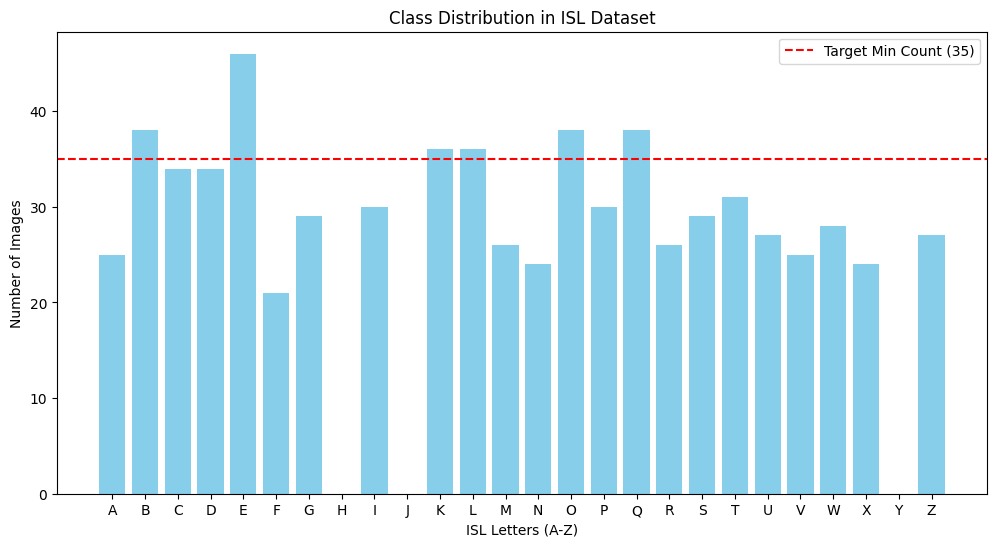

In [10]:
import matplotlib.pyplot as plt

# Class counts from previous step
class_counts = {
    "A": 25, "B": 38, "C": 34, "D": 34, "E": 46, "F": 21, "G": 29, "H":0, "I": 30,
    "J":0, "K": 36, "L": 36, "M": 26, "N": 24, "O": 38, "P": 30, "Q": 38, "R": 26,
    "S": 29, "T": 31, "U": 27, "V": 25, "W": 28, "X": 24, "Y":0, "Z": 27
}

# Plot class distribution
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.axhline(y=35, color='r', linestyle='--', label="Target Min Count (35)")
plt.xlabel("ISL Letters (A-Z)")
plt.ylabel("Number of Images")
plt.title("Class Distribution in ISL Dataset")
plt.legend()
plt.show()


In [12]:
import os
import cv2
import numpy as np

# Path to ISL dataset
dataset_path = r"C:\Users\gnana\Desktop\Major project\ISL_dataset\ISL_dataset"

# Augmentation functions
def rotate_image(image):
    angle = np.random.randint(-15, 15)  # Rotate between -15 to +15 degrees
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, matrix, (w, h))

def flip_image(image):
    return cv2.flip(image, 1)  # Horizontal flip

def adjust_brightness(image):
    factor = np.random.uniform(0.8, 1.2)  # Random brightness factor
    return np.clip(image * factor, 0, 255).astype(np.uint8)

# Augment images for classes with less than 35 samples
def augment_images(folder_path, target_count=35):
    images = [img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    existing_count = len(images)

    if existing_count >= target_count:
        return  # No augmentation needed

    print(f"Augmenting {folder_path}: {existing_count} → {target_count}")

    for img_name in images:
        if existing_count >= target_count:
            break  # Stop once the target is reached

        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)

        # Apply random augmentation
        aug_img = rotate_image(img)
        aug_img = flip_image(aug_img)
        aug_img = adjust_brightness(aug_img)

        # Save augmented image
        aug_img_path = os.path.join(folder_path, f"aug_{existing_count}_{img_name}")
        cv2.imwrite(aug_img_path, aug_img)
        existing_count += 1

# Apply augmentation to underrepresented classes
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        num_images = len([img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])
        if num_images < 35:
            augment_images(folder_path)

print("✅ Dataset augmentation completed.")

Augmenting C:\Users\gnana\Desktop\Major project\ISL_dataset\ISL_dataset\A: 25 → 35
Augmenting C:\Users\gnana\Desktop\Major project\ISL_dataset\ISL_dataset\C: 34 → 35
Augmenting C:\Users\gnana\Desktop\Major project\ISL_dataset\ISL_dataset\D: 34 → 35
Augmenting C:\Users\gnana\Desktop\Major project\ISL_dataset\ISL_dataset\F: 21 → 35
Augmenting C:\Users\gnana\Desktop\Major project\ISL_dataset\ISL_dataset\G: 29 → 35
Augmenting C:\Users\gnana\Desktop\Major project\ISL_dataset\ISL_dataset\I: 30 → 35
Augmenting C:\Users\gnana\Desktop\Major project\ISL_dataset\ISL_dataset\M: 26 → 35
Augmenting C:\Users\gnana\Desktop\Major project\ISL_dataset\ISL_dataset\N: 24 → 35
Augmenting C:\Users\gnana\Desktop\Major project\ISL_dataset\ISL_dataset\P: 30 → 35
Augmenting C:\Users\gnana\Desktop\Major project\ISL_dataset\ISL_dataset\R: 26 → 35
Augmenting C:\Users\gnana\Desktop\Major project\ISL_dataset\ISL_dataset\S: 29 → 35
Augmenting C:\Users\gnana\Desktop\Major project\ISL_dataset\ISL_dataset\T: 31 → 35
Augm

In [13]:
import os

# Path to ISL dataset
dataset_path = r"C:\Users\gnana\Desktop\Major project\ISL_dataset\ISL_dataset"

# Dictionary to store updated image counts
class_counts = {}

# Loop through each subfolder (A-Z)
for folder in sorted(os.listdir(dataset_path)):  
    folder_path = os.path.join(dataset_path, folder)
    
    if os.path.isdir(folder_path):  # Check if it's a directory
        num_images = len([img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])
        class_counts[folder] = num_images
        print(f"📂 {folder}: {num_images} images")

# Optional: Print summary
print("\n✅ Total classes:", len(class_counts))
print("✅ Total images in dataset:", sum(class_counts.values()))


📂 A: 35 images
📂 B: 38 images
📂 C: 35 images
📂 D: 35 images
📂 E: 46 images
📂 F: 35 images
📂 G: 35 images
📂 I: 35 images
📂 K: 36 images
📂 L: 36 images
📂 M: 35 images
📂 N: 35 images
📂 O: 38 images
📂 P: 35 images
📂 Q: 38 images
📂 R: 35 images
📂 S: 35 images
📂 T: 35 images
📂 U: 35 images
📂 V: 35 images
📂 W: 35 images
📂 X: 35 images
📂 Z: 35 images

✅ Total classes: 23
✅ Total images in dataset: 827


In [14]:
import os

# Path to ISL dataset
dataset_path = r"C:\Users\gnana\Desktop\Major project\ISL_dataset\ISL_dataset"

# Dictionary to store updated image counts
class_counts = {}

# Loop through each subfolder (A-Z)
for folder in sorted(os.listdir(dataset_path)):  
    folder_path = os.path.join(dataset_path, folder)
    
    if os.path.isdir(folder_path):  # Check if it's a directory
        num_images = len([img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])
        class_counts[folder] = num_images
        print(f"📂 {folder}: {num_images} images")

# Optional: Print summary
print("\n✅ Total classes:", len(class_counts))
print("✅ Total images in dataset:", sum(class_counts.values()))


📂 A: 35 images
📂 B: 38 images
📂 C: 35 images
📂 D: 35 images
📂 E: 46 images
📂 F: 35 images
📂 G: 35 images
📂 H: 29 images
📂 I: 35 images
📂 J: 28 images
📂 K: 36 images
📂 L: 36 images
📂 M: 35 images
📂 N: 35 images
📂 O: 38 images
📂 P: 35 images
📂 Q: 38 images
📂 R: 35 images
📂 S: 35 images
📂 T: 35 images
📂 U: 35 images
📂 V: 35 images
📂 W: 35 images
📂 X: 35 images
📂 Y: 29 images
📂 Z: 35 images

✅ Total classes: 26
✅ Total images in dataset: 913


In [15]:
import cv2
import numpy as np

# Augmentation functions
def rotate_image(image):
    angle = np.random.randint(-15, 15)
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, matrix, (w, h))

def flip_image(image):
    return cv2.flip(image, 1)  # Horizontal flip

def adjust_brightness(image):
    factor = np.random.uniform(0.8, 1.2)
    return np.clip(image * factor, 0, 255).astype(np.uint8)

# Augment specific classes
def augment_images(folder_path, current_count, target_count=35):
    images = [img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    print(f"Augmenting {folder_path}: {current_count} → {target_count}")

    for img_name in images:
        if current_count >= target_count:
            break  # Stop when target reached

        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)

        # Apply transformations
        aug_img = rotate_image(img)
        aug_img = flip_image(aug_img)
        aug_img = adjust_brightness(aug_img)

        # Save augmented image
        aug_img_path = os.path.join(folder_path, f"aug_{current_count}_{img_name}")
        cv2.imwrite(aug_img_path, aug_img)
        current_count += 1

# Path to dataset
dataset_path = r"C:\Users\gnana\Desktop\Major project\ISL_dataset\ISL_dataset"

# Augment only for H, J, and Y
for folder in ["H", "J", "Y"]:
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        num_images = len([img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])
        if num_images < 35:
            augment_images(folder_path, num_images)

print("✅ Final augmentation completed for H, J, Y.")


Augmenting C:\Users\gnana\Desktop\Major project\ISL_dataset\ISL_dataset\H: 29 → 35
Augmenting C:\Users\gnana\Desktop\Major project\ISL_dataset\ISL_dataset\J: 28 → 35
Augmenting C:\Users\gnana\Desktop\Major project\ISL_dataset\ISL_dataset\Y: 29 → 35
✅ Final augmentation completed for H, J, Y.


In [16]:
import os

# Path to ISL dataset
dataset_path = r"C:\Users\gnana\Desktop\Major project\ISL_dataset\ISL_dataset"

# Dictionary to store image counts
class_counts = {}

# Loop through each subfolder (A-Z)
for folder in sorted(os.listdir(dataset_path)):  
    folder_path = os.path.join(dataset_path, folder)
    
    if os.path.isdir(folder_path):  # Check if it's a directory
        num_images = len([img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])
        class_counts[folder] = num_images
        print(f"📂 {folder}: {num_images} images")

# Optional: Print summary
print("\n✅ Total classes:", len(class_counts))
print("✅ Total images in dataset:", sum(class_counts.values()))

📂 A: 35 images
📂 B: 38 images
📂 C: 35 images
📂 D: 35 images
📂 E: 46 images
📂 F: 35 images
📂 G: 35 images
📂 H: 35 images
📂 I: 35 images
📂 J: 35 images
📂 K: 36 images
📂 L: 36 images
📂 M: 35 images
📂 N: 35 images
📂 O: 38 images
📂 P: 35 images
📂 Q: 38 images
📂 R: 35 images
📂 S: 35 images
📂 T: 35 images
📂 U: 35 images
📂 V: 35 images
📂 W: 35 images
📂 X: 35 images
📂 Y: 35 images
📂 Z: 35 images

✅ Total classes: 26
✅ Total images in dataset: 932


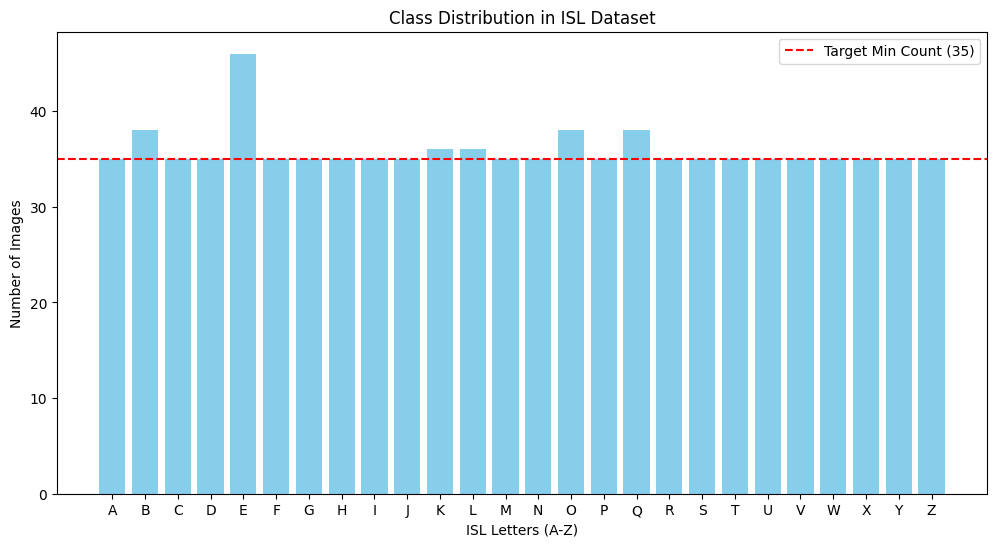

In [17]:
import matplotlib.pyplot as plt

# Class counts from previous step
class_counts = {
    "A": 35, "B": 38, "C": 35, "D": 35, "E": 46, "F": 35, "G": 35, "H":35, "I": 35,
    "J":35, "K": 36, "L": 36, "M": 35, "N": 35, "O": 38, "P": 35, "Q": 38, "R": 35,
    "S": 35, "T": 35, "U": 35, "V": 35, "W": 35, "X": 35, "Y": 35, "Z": 35
}

# Plot class distribution
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.axhline(y=35, color='r', linestyle='--', label="Target Min Count (35)")
plt.xlabel("ISL Letters (A-Z)")
plt.ylabel("Number of Images")
plt.title("Class Distribution in ISL Dataset")
plt.legend()
plt.show()


In [18]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import shutil


In [21]:
# Path to original dataset
dataset_path = r"C:\Users\gnana\Desktop\Major project\ISL_dataset\ISL_dataset"

# Paths for processed dataset
processed_path = r"C:\Users\gnana\Desktop\Major project\Processed_ISL"
train_path = os.path.join(processed_path, "train")
test_path = os.path.join(processed_path, "test")

# Create directories if they don't exist
for path in [train_path, test_path]:
    if not os.path.exists(path):
        os.makedirs(path)


In [22]:
# Define image size
IMG_SIZE = 128  # Resize images to 128x128

# Load dataset
data = []
labels = []
classes = sorted(os.listdir(dataset_path))  # Ensure classes are sorted A-Z

for class_label, folder in enumerate(classes):  
    folder_path = os.path.join(dataset_path, folder)
    
    if os.path.isdir(folder_path):
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)

            if img is not None:
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize
                img = img / 255.0  # Normalize pixel values (0-1)
                data.append(img)
                labels.append(class_label)

data = np.array(data)
labels = np.array(labels)

# Split into Train (80%) & Test (20%)
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, stratify=labels, random_state=42
)


In [23]:
# Function to save images in structured format
def save_images(data, labels, folder_path):
    for i, img in enumerate(data):
        class_name = classes[labels[i]]  # Convert label index to class name
        class_folder = os.path.join(folder_path, class_name)
        
        if not os.path.exists(class_folder):
            os.makedirs(class_folder)
        
        img_path = os.path.join(class_folder, f"img_{i}.jpg")
        cv2.imwrite(img_path, (img * 255).astype(np.uint8))  # Convert back to 0-255 range

# Save Train & Test Data
save_images(train_data, train_labels, train_path)
save_images(test_data, test_labels, test_path)

print("✅ Image Preprocessing Completed!")
print(f"✅ Processed Data Saved in: {processed_path}")


✅ Image Preprocessing Completed!
✅ Processed Data Saved in: C:\Users\gnana\Desktop\Major project\Processed_ISL
